In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


In [137]:
#loading df
df = pd.read_csv('./data/telecom-customer-data.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [138]:
df.info()

# Target value => Churn

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Pré processamento dos dados

In [139]:
df = df.drop('customerID', axis=1)

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [140]:
print("Distribuição de Churn no dataset completo:")
print(df['Churn'].value_counts(normalize=True))

Distribuição de Churn no dataset completo:
Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


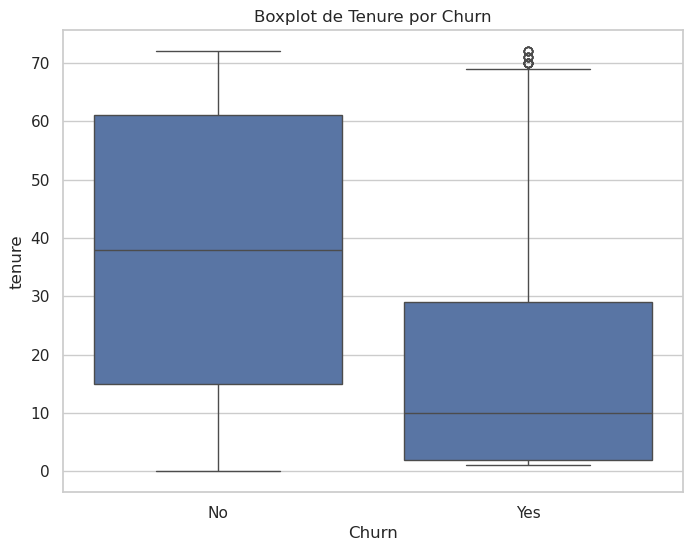

In [141]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Boxplot de Tenure por Churn')
plt.show()
plt.close()

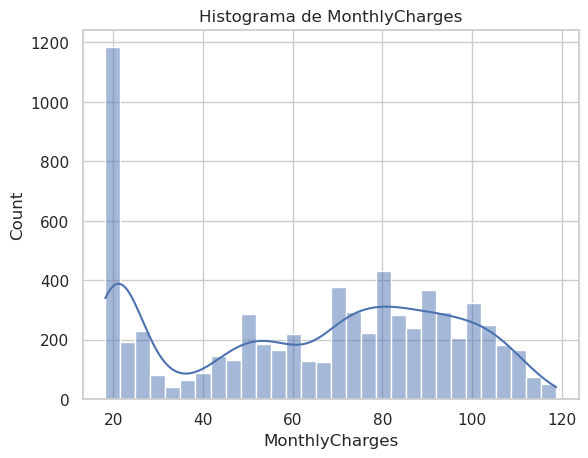

In [142]:
plt.figure()
sns.histplot(df['MonthlyCharges'], bins=30, kde=True)
plt.title('Histograma de MonthlyCharges')
plt.show()
plt.close()

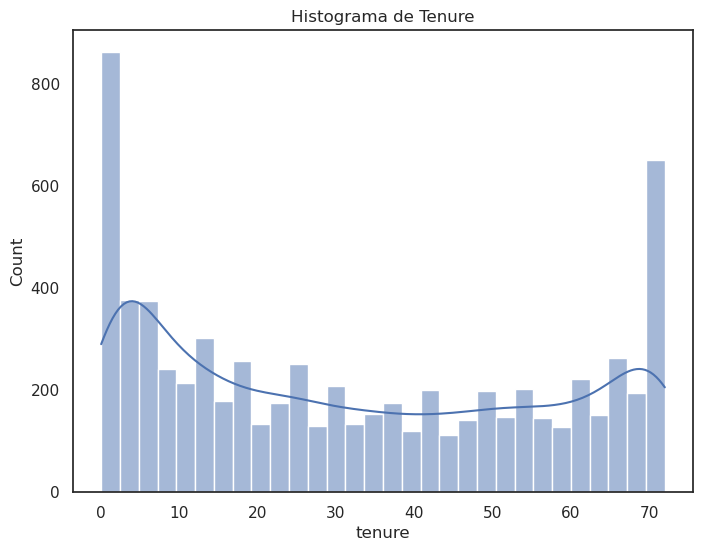

In [157]:
plt.figure(figsize=(8, 6))
sns.histplot(df['tenure'], bins=30, kde=True)
plt.title('Histograma de Tenure')
plt.show()
plt.close()

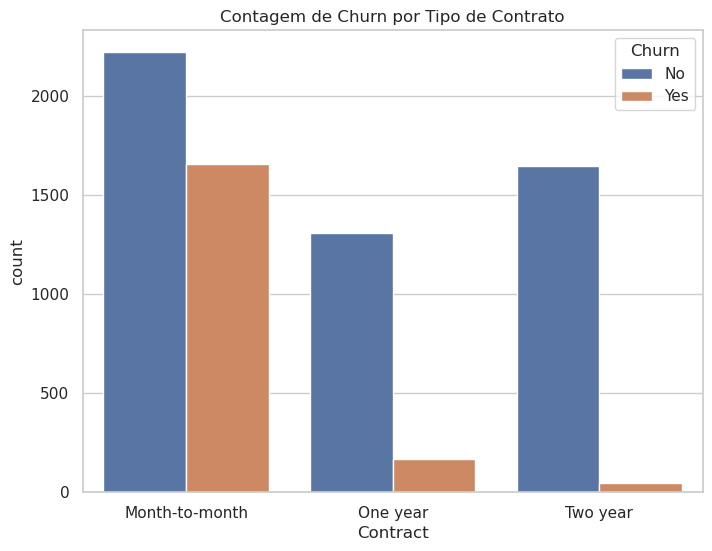

In [143]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Contagem de Churn por Tipo de Contrato')
plt.show()
plt.close()

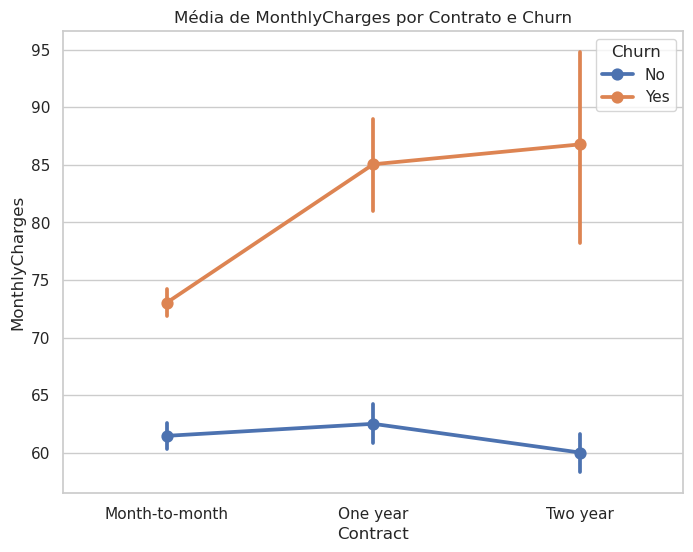

In [144]:
plt.figure(figsize=(8, 6))
sns.pointplot(x='Contract', y='MonthlyCharges', hue='Churn', data=df)
plt.title('Média de MonthlyCharges por Contrato e Churn')
plt.show()
plt.close()

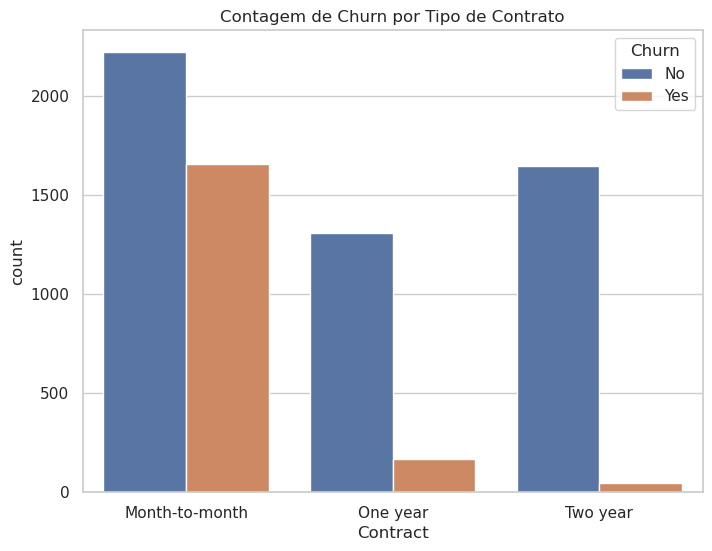

In [145]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Contagem de Churn por Tipo de Contrato')
plt.show()
plt.close()

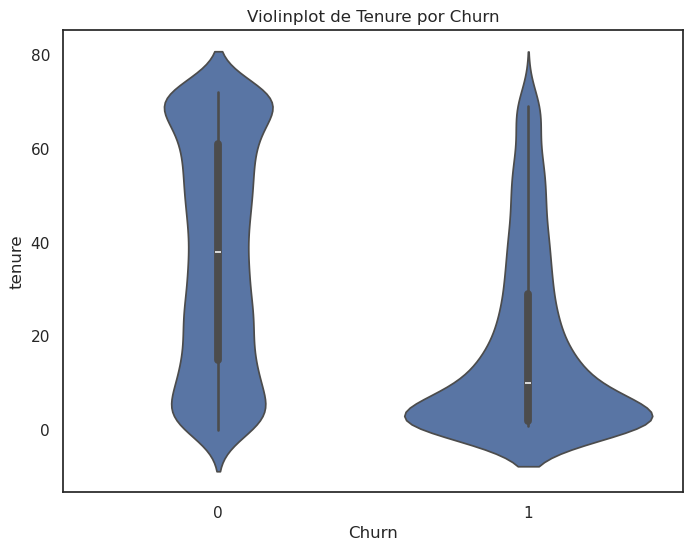

In [155]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Churn', y='tenure', data=df)
plt.title('Violinplot de Tenure por Churn')
plt.show()
plt.close()

In [146]:
# Codificar variáveis aleatórias

cat_columns = df.select_dtypes(include=['object']).columns
label_encoders = {}
for col in cat_columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


[]

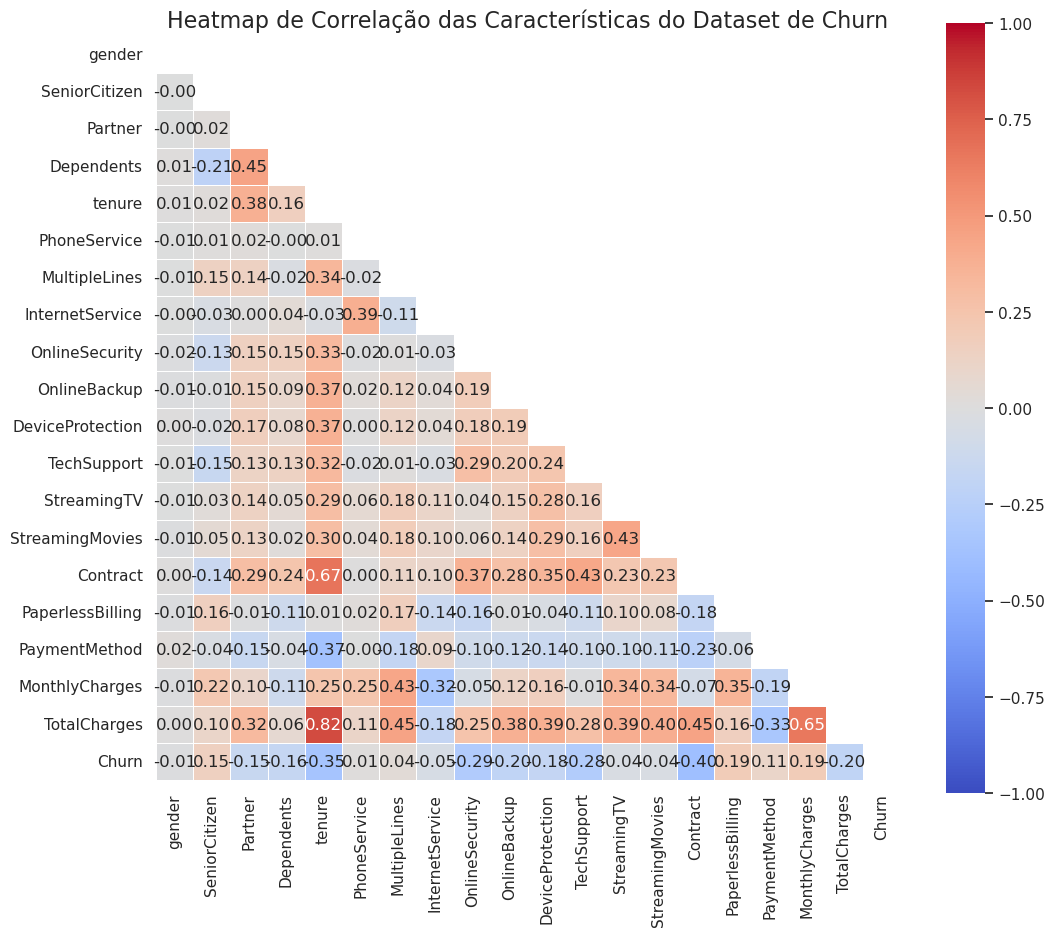

In [147]:
correlation_matrix = df.corr()

churn_correlation = correlation_matrix[['Churn']].sort_values(by='Churn', ascending=False)

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.set_theme(style="white")

plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,           
    fmt=".2f",           
    cmap='coolwarm',      
    vmin=-1, vmax=1,    
    center=0,             
    linewidths=0.5,       
    square=True  ,       
    mask=mask 
)

plt.title('Heatmap de Correlação das Características do Dataset de Churn', fontsize=16)

plt.plot()

In [148]:
# Separar feature e Target

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [149]:
from sklearn.tree import DecisionTreeClassifier

# Criar e treinar o modelo
clf = DecisionTreeClassifier(max_depth=5, random_state=42)  # Limitar profundidade para evitar overfitting
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [150]:
from sklearn.metrics import accuracy_score, classification_report

# Avaliar desempenho
print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

# Importância das variáveis
importances = pd.DataFrame({'Feature': X.columns, 'Importance': clf.feature_importances_})
print("\nImportância das Variáveis:\n", importances.sort_values(by='Importance', ascending=False))

Acurácia: 0.794180269694819

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86      1036
           1       0.61      0.64      0.62       373

    accuracy                           0.79      1409
   macro avg       0.74      0.74      0.74      1409
weighted avg       0.80      0.79      0.80      1409


Importância das Variáveis:
              Feature  Importance
14          Contract    0.534289
8     OnlineSecurity    0.138618
4             tenure    0.108788
7    InternetService    0.076823
17    MonthlyCharges    0.063885
18      TotalCharges    0.054415
16     PaymentMethod    0.013027
5       PhoneService    0.005098
13   StreamingMovies    0.005057
12       StreamingTV    0.000000
15  PaperlessBilling    0.000000
0             gender    0.000000
11       TechSupport    0.000000
10  DeviceProtection    0.000000
1      SeniorCitizen    0.000000
6      MultipleLines    0.000000
3         Dependents    0

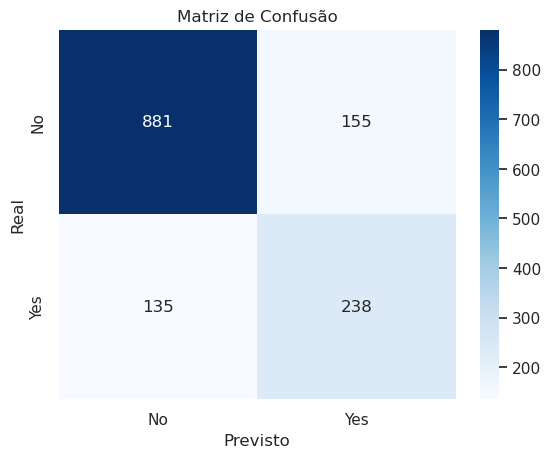

In [151]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

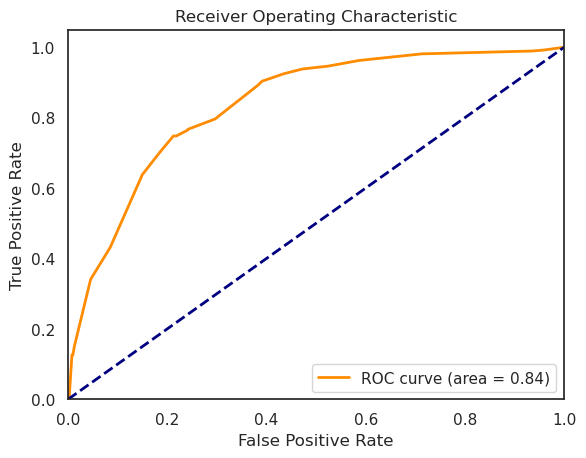

In [152]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_probs = clf.predict_proba(X_test)[:, 1]

# Calcular FPR, TPR, e limiares
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calcular a AUC
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


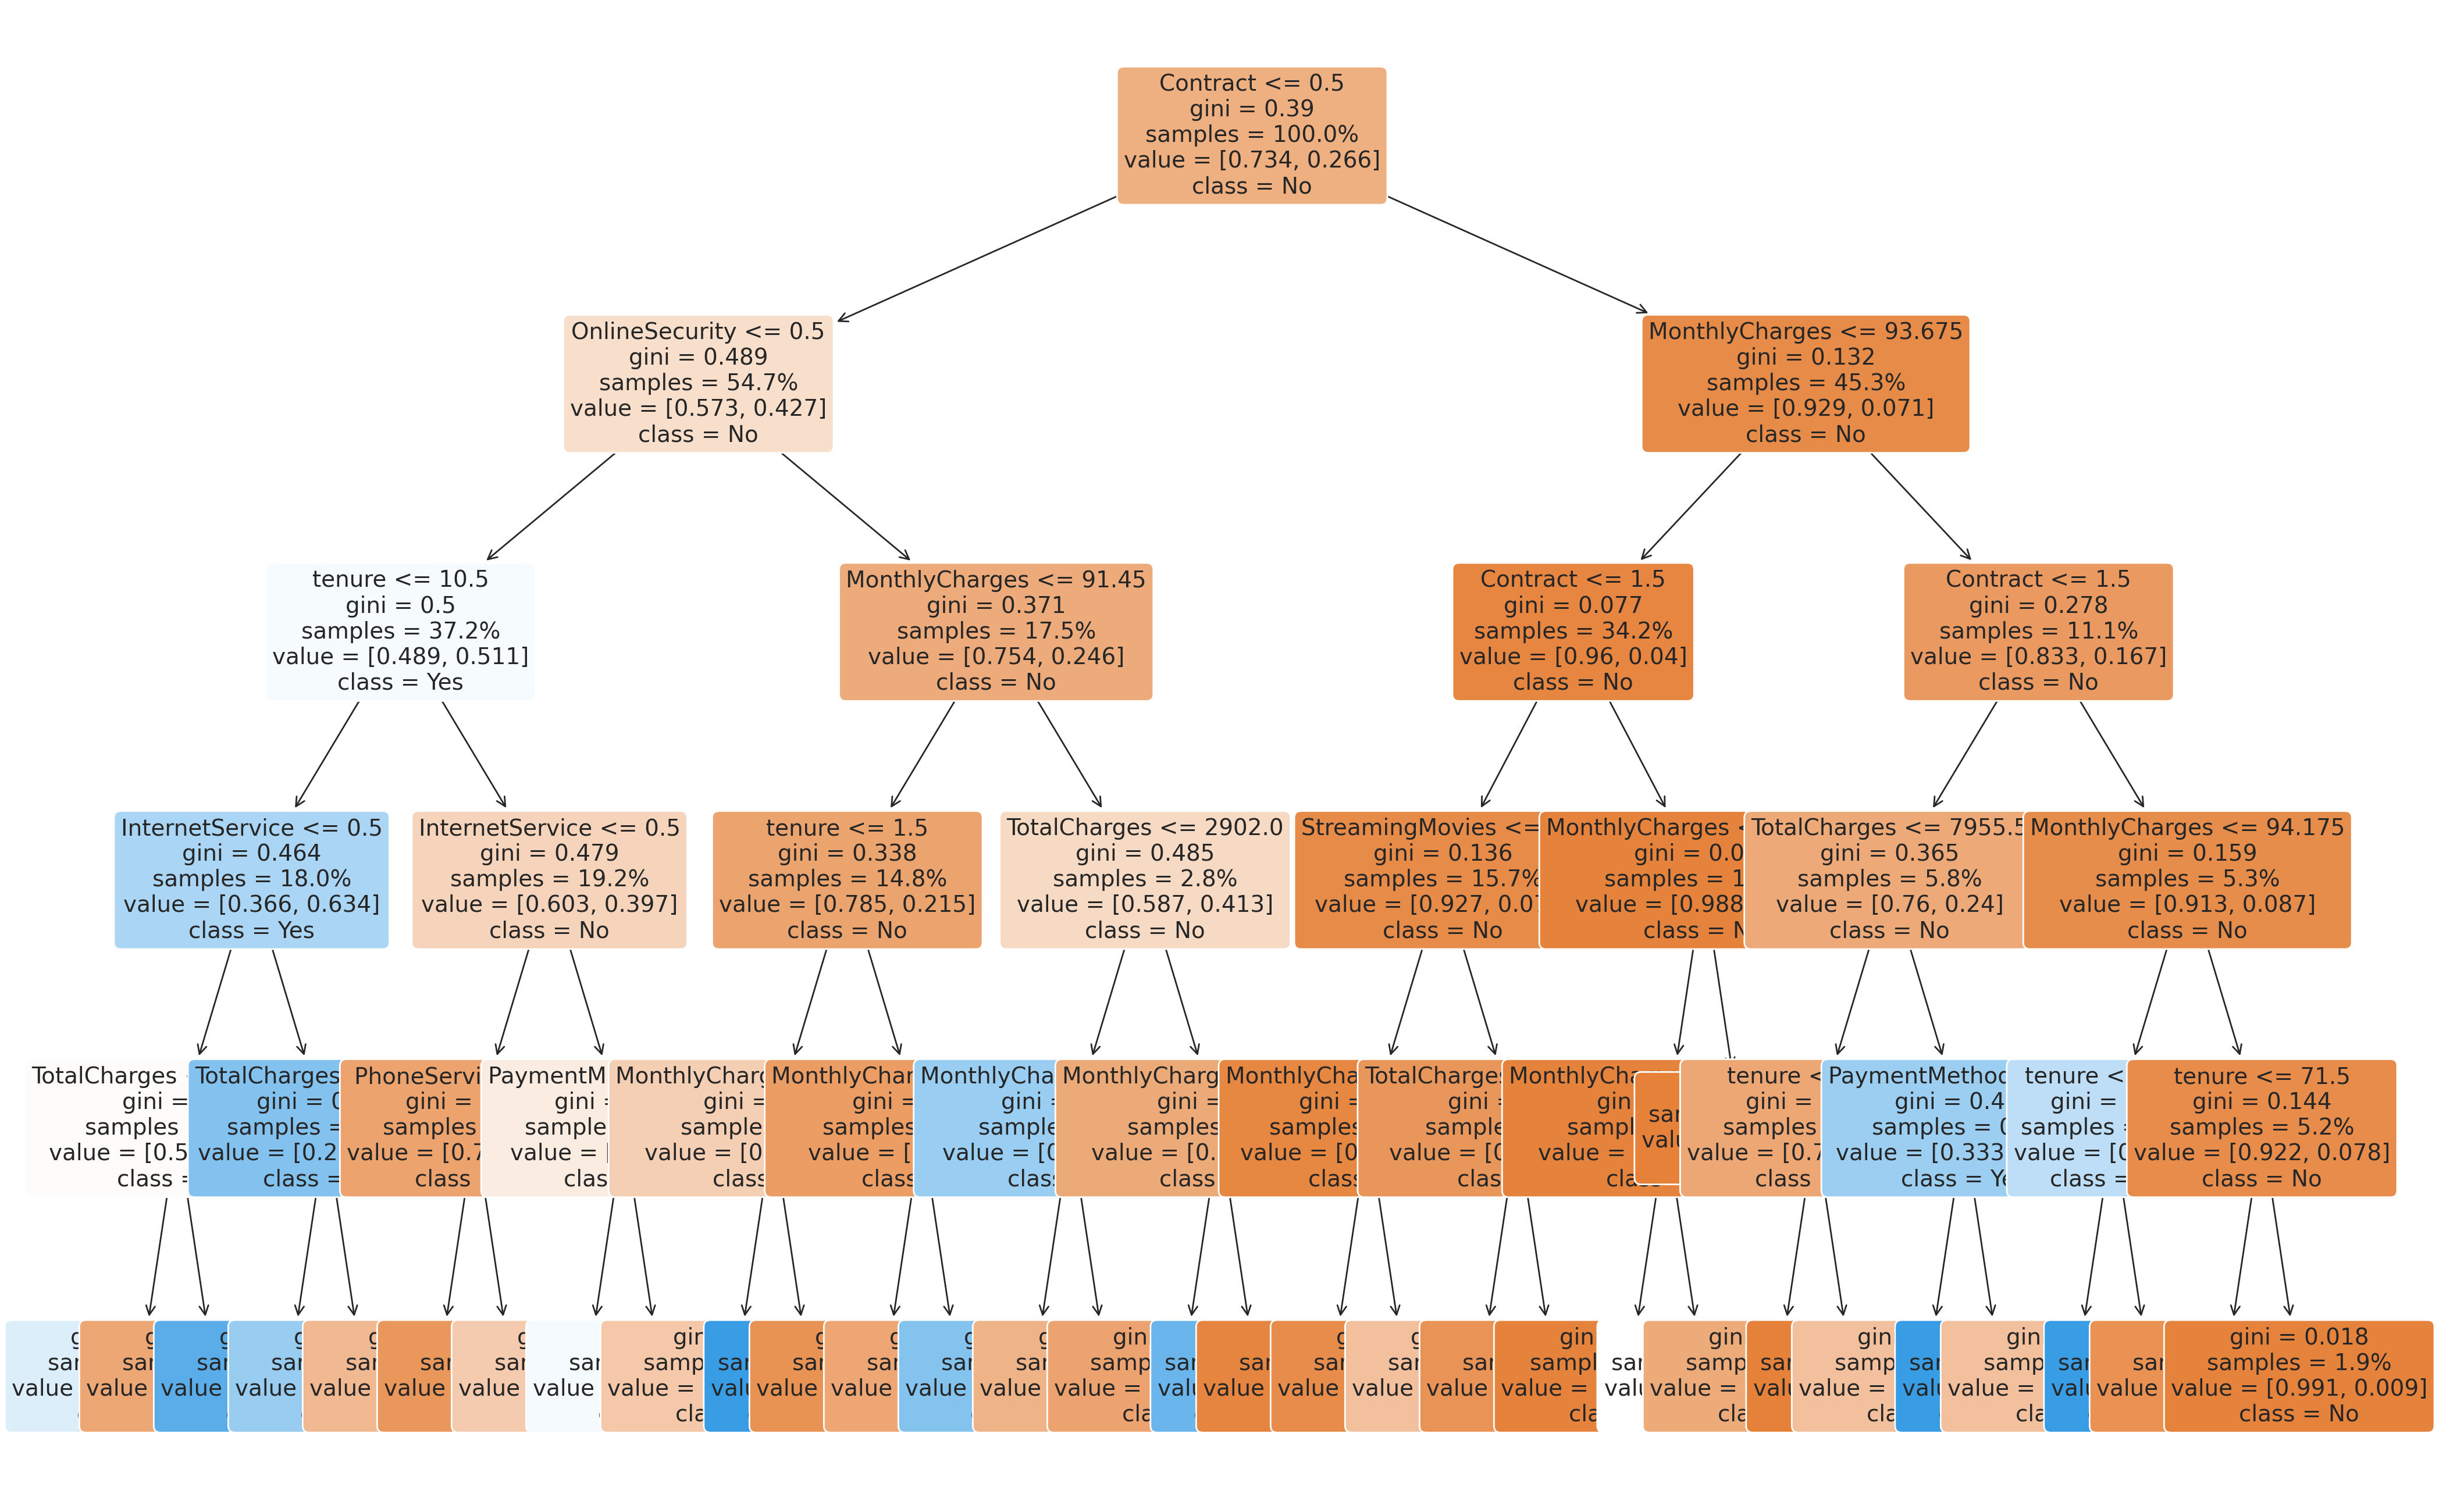

In [163]:
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(24, 16), dpi=200)
plot_tree(clf, feature_names=X_train.columns, class_names=['No', 'Yes'], 
          filled=True, rounded=True, fontsize=14, proportion=True, ax=ax)

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

plt.show()

In [165]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier(random_state=42)

param_grid = {
    'criterion': ['gini', 'entropy'],         
    'max_depth': [3, 5, 7, 10, None],        
    'min_samples_split': [2, 5, 10],         
    'min_samples_leaf': [1, 2, 4],           
    'class_weight': [None, 'balanced', {0: 1, 1: 2}, {0: 1, 1: 3}],
    }

# Configurar o GridSearchCV
grid_search = GridSearchCV(
    estimator=dt, 
    param_grid=param_grid, 
    cv=5,                
    scoring='accuracy',  
    n_jobs=-1            
)

grid_search.fit(X_train, y_train)

print("Melhores hiperparâmetros:", grid_search.best_params_)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

print("Acurácia no conjunto de teste:", accuracy_score(y_test, y_pred))

Melhores hiperparâmetros: {'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Acurácia no conjunto de teste: 0.794180269694819
